In [46]:
import pandas as pd 
from pathlib import Path
pd.options.plotting.backend = "plotly"

# experiment = Path('ifstake/trial_spread_1000')
experiment = Path('if_stake/trial_no_oracle_guards')
# experiment = Path('add_open_remove_close/trial_spread_1000')
def experiment_path(file_name):
    return '../experiments/results/'/experiment/f'{file_name}.csv'

market = pd.read_csv(experiment_path('perp_market_0'))
len(market)

91

In [47]:
ix_logs = pd.read_csv(experiment_path('ix_logs'))
ix_names = ix_logs['ix_name'].unique()
for ix in ix_names:
    df = ix_logs[ix_logs['ix_name'] == ix]['compute']
    v = df.mean()
    v2 = df.max()
    if v != -1: 
        print(ix, f'compute \n\tmean: {v:,.0f} max: {v2:,.0f}')

resolve_perp_bankruptcy compute 
	mean: 79,048 max: 88,378


In [49]:
df = pd.read_csv(experiment_path('spot_market_0'))
df['spot_market.insurance_fund.total_shares'].plot()

In [34]:
vault = pd.read_csv(experiment_path('spot_vault_0'))
vault['amount'].plot()

y values: [         0  100000000  200000000  300000000  400000000  500000000
  600000000  700000000  800000000  900000000 1000000000  782250908
  764499298  546700503  329012379  193520687          1          1
          1          1  100000001  200000001  300000001  400000001
  500000001  600000001  700000001  800000001  900000001 1000000001
   32891757]


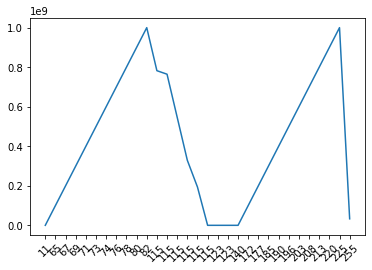

In [35]:
import matplotlib.pyplot as plt 
vault = pd.read_csv(experiment_path('insurance_vault_0'))
y = vault['amount'].values
x = vault['slot'].values 
print('y values:', y)
plt.plot(y)
plt.xticks(range(len(y)), x, rotation=45);

In [27]:
ix_logs = pd.read_csv(experiment_path('ix_logs'))
# ix_logs = ix_logs[~ix_logs['error'].isnull()]
print(ix_logs['ix_name'].unique())

['init_if_stake' 'add_if_stake' 'open_position' 'liquidate_perp'
 'oracle_price' 'liquidate_perp_pnl_for_deposit' 'resolve_perp_bankruptcy'
 'close_position' 'settle_pnl']


In [7]:
import pprint 
pprint.pprint(market.columns.values)

array(['market.pubkey', 'market.name',
       'market.unrealized_pnl_max_imbalance', 'market.expiry_ts',
       'market.expiry_price', 'market.next_fill_record_id',
       'market.next_funding_rate_record_id',
       'market.next_curve_record_id', 'market.imf_factor',
       'market.unrealized_pnl_imf_factor', 'market.liquidator_fee',
       'market.if_liquidation_fee', 'market.margin_ratio_initial',
       'market.margin_ratio_maintenance',
       'market.unrealized_pnl_initial_asset_weight',
       'market.unrealized_pnl_maintenance_asset_weight',
       'market.number_of_users_with_base', 'market.number_of_users',
       'market.market_index', 'market.status', 'market.contract_type',
       'market.contract_tier', 'market.padding', 'market.amm.oracle',
       'market.amm.base_asset_amount_per_lp',
       'market.amm.quote_asset_amount_per_lp',
       'market.amm.base_asset_reserve', 'market.amm.quote_asset_reserve',
       'market.amm.concentration_coef',
       'market.amm.min_base

In [16]:
market[[
    'market.amm.historical_oracle_data.last_oracle_price',
    'market.expiry_price',
    'market.amm.historical_oracle_data.last_oracle_price_twap',
    'market.amm.base_asset_amount_with_amm',
]].plot()

In [29]:
market[[
    'market.amm.base_asset_reserve',
    'market.amm.quote_asset_reserve',
    'market.amm.terminal_quote_asset_reserve',
    'market.amm.base_asset_amount_with_amm',
    'market.amm.sqrt_k',
]].plot()

In [32]:
market[[
    'market.amm.base_asset_reserve',
    'market.amm.min_base_asset_reserve',
    'market.amm.max_base_asset_reserve',
    'market.amm.user_lp_shares'
]].plot()

In [33]:
market[[
    # "market.amm.peg_multiplier"
    'market.amm.base_asset_amount_long',
    'market.amm.base_asset_amount_short',
    'market.amm.base_asset_amount_with_amm',
]].plot()

In [35]:
user = pd.read_csv(experiment_path('user_0'))
user

,authority,delegate,name,spot_positions,perp_positions,orders,last_add_perp_lp_shares_ts,total_deposits,total_withdraws,settled_perp_pnl,...,max_margin_ratio,next_liquidation_id,sub_account_id,is_being_liquidated,is_bankrupt,is_margin_trading_enabled,padding,slot,write_version,updated_on
0,7vmQ8NcmRVB1TGJUJN1mwVVcZENje16dTQsgjHsNyX8Z,11111111111111111111111111111111,ListContainer: \n 77\n 97\n 105\n ...,ListContainer: \n SpotPosition(scaled_balan...,ListContainer: \n PerpPosition(last_cumulat...,"ListContainer: \n Order(slot=0, price=0, ba...",0,0,0,0,...,0,1,0,False,False,False,ListContainer: \n 0,28,419,2022-10-27 15:10:46.196109
1,7vmQ8NcmRVB1TGJUJN1mwVVcZENje16dTQsgjHsNyX8Z,11111111111111111111111111111111,ListContainer: \n 77\n 97\n 105\n ...,ListContainer: \n SpotPosition(scaled_balan...,ListContainer: \n PerpPosition(last_cumulat...,"ListContainer: \n Order(slot=0, price=0, ba...",0,272554635,0,0,...,0,1,0,False,False,False,ListContainer: \n 0,30,612,2022-10-27 15:10:46.998838
2,7vmQ8NcmRVB1TGJUJN1mwVVcZENje16dTQsgjHsNyX8Z,11111111111111111111111111111111,ListContainer: \n 77\n 97\n 105\n ...,ListContainer: \n SpotPosition(scaled_balan...,ListContainer: \n PerpPosition(last_cumulat...,"ListContainer: \n Order(slot=0, price=0, ba...",0,272554635,0,0,...,0,1,0,False,False,False,ListContainer: \n 0,276,3106,2022-10-27 15:12:45.356564
3,7vmQ8NcmRVB1TGJUJN1mwVVcZENje16dTQsgjHsNyX8Z,11111111111111111111111111111111,ListContainer: \n 77\n 97\n 105\n ...,ListContainer: \n SpotPosition(scaled_balan...,ListContainer: \n PerpPosition(last_cumulat...,"ListContainer: \n Order(slot=0, price=0, ba...",0,272554635,0,-60976687,...,0,1,0,False,False,False,ListContainer: \n 0,514,5140,2022-10-27 15:14:39.250703
4,7vmQ8NcmRVB1TGJUJN1mwVVcZENje16dTQsgjHsNyX8Z,11111111111111111111111111111111,ListContainer: \n 77\n 97\n 105\n ...,ListContainer: \n SpotPosition(scaled_balan...,ListContainer: \n PerpPosition(last_cumulat...,"ListContainer: \n Order(slot=0, price=0, ba...",0,272554635,0,-60976687,...,0,1,0,False,False,False,ListContainer: \n 0,618,6026,2022-10-27 15:15:29.156259
5,7vmQ8NcmRVB1TGJUJN1mwVVcZENje16dTQsgjHsNyX8Z,11111111111111111111111111111111,ListContainer: \n 77\n 97\n 105\n ...,ListContainer: \n SpotPosition(scaled_balan...,ListContainer: \n PerpPosition(last_cumulat...,"ListContainer: \n Order(slot=0, price=0, ba...",0,272554635,0,-60976687,...,0,1,0,False,False,False,ListContainer: \n 0,638,6221,2022-10-27 15:15:38.707527
6,7vmQ8NcmRVB1TGJUJN1mwVVcZENje16dTQsgjHsNyX8Z,11111111111111111111111111111111,ListContainer: \n 77\n 97\n 105\n ...,ListContainer: \n SpotPosition(scaled_balan...,ListContainer: \n PerpPosition(last_cumulat...,"ListContainer: \n Order(slot=0, price=0, ba...",0,272554635,0,-60976687,...,0,1,0,False,False,False,ListContainer: \n 0,721,6899,2022-10-27 15:16:18.309759
7,7vmQ8NcmRVB1TGJUJN1mwVVcZENje16dTQsgjHsNyX8Z,11111111111111111111111111111111,ListContainer: \n 77\n 97\n 105\n ...,ListContainer: \n SpotPosition(scaled_balan...,ListContainer: \n PerpPosition(last_cumulat...,"ListContainer: \n Order(slot=0, price=0, ba...",0,272554635,0,-60976687,...,0,1,0,False,False,False,ListContainer: \n 0,728,6957,2022-10-27 15:16:21.655064
8,7vmQ8NcmRVB1TGJUJN1mwVVcZENje16dTQsgjHsNyX8Z,11111111111111111111111111111111,ListContainer: \n 77\n 97\n 105\n ...,ListContainer: \n SpotPosition(scaled_balan...,ListContainer: \n PerpPosition(last_cumulat...,"ListContainer: \n Order(slot=0, price=0, ba...",0,272554635,0,53561618,...,0,1,0,False,False,False,ListContainer: \n 0,1553,14037,2022-10-27 15:22:55.945892
9,7vmQ8NcmRVB1TGJUJN1mwVVcZENje16dTQsgjHsNyX8Z,11111111111111111111111111111111,ListContainer: \n 77\n 97\n 105\n ...,ListContainer: \n SpotPosition(scaled_balan...,ListContainer: \n PerpPosition(last_cumulat...,"ListContainer: \n Order(slot=0, price=0, ba...",0,272554635,326116253,53561618,...,0,1,0,False,False,False,ListContainer: \n 0,1593,14391,2022-10-27 15:23:14.747502
